In [6]:
# Daten Einlesen
import pandas as pd
filename1 = 'XMOVERScore_BERT_X.csv'
filename2 = 'XMOVERScore_tiny_bert.csv'


df1 = pd.read_csv(filename1)
df2 = pd.read_csv(filename2)
tiny_BERT_Modelle = pd.read_csv('XMOVERScore_TinyUebersicht.csv')

bert_df = df1.iloc[0:7]     # Base Line
xlmrob_df = pd.read_csv('XMOVERScore_XLM-Roberta.csv')
distil_df = df1.iloc[14:]

tiny1 = tiny_BERT_Modelle.iloc[0:7]
tiny2 = tiny_BERT_Modelle.iloc[7:14]
tiny3 = tiny_BERT_Modelle.iloc[14:]

print(bert_df)
print(xlmrob_df)

tiny_models_df = [tiny1, tiny2, tiny3]
print("Tiny-VErsions")
for tin in tiny_models_df:
    print(tin)

      LP  Score       Time    Memory  LM_Score   LM_Time  LM_Usage
0  cs-en  0.235  15.350510  3.558393     0.441  9.155029  0.964488
1  de-en  0.397  13.264046  2.286715     0.485  9.062764  0.877836
2  fi-en  0.337  12.962186  2.195590     0.621  9.007933  0.491337
3  lv-en  0.222  14.124704  3.180200     0.591  7.041997  0.303266
4  ru-en  0.342  15.306884  2.705046     0.491  9.041218  0.265173
5  tr-en  0.341  14.761524  3.258908     0.473  9.018890  0.227115
6  zh-en  0.367  15.699397  2.547295     0.454  9.111060  0.818632
      LP  Score       Time    Memory  LM_Score   LM_Time  LM_Usage
0  cs-en  0.518  13.412430  3.191529     0.549  9.474414  0.964335
1  de-en  0.590  13.114895  2.639378     0.586  9.220241  0.877739
2  fi-en  0.697  11.004122  2.091645     0.716  9.224232  0.491266
3  lv-en  0.610  11.281559  2.573953     0.688  7.197632  0.303043
4  ru-en  0.640  13.458505  2.561002     0.650  9.226392  0.264838
5  tr-en  0.638  11.925952  2.574385     0.627  9.536940  0.22

In [2]:
#Andere Reihen anschauen und Mittel bilden
all2 = pd.read_csv('XMOVERScore_Druchlauf2.csv')
all3 = pd.read_csv('XMOVERScore_Druchlauf3.csv')
all4 = pd.read_csv('XMOVERScore_Druchlauf4.csv')
all5 = pd.read_csv('XMOVERScore_Druchlauf5.csv')

data= [all2, all3, all4, all5]
all_average = all2.copy()

for col in range(1,all_average.shape[1]):
    for row in range(all_average.shape[0]):
        temp=0
        for val in data:
            temp += abs(val.iloc[row, col])
        all_average.iloc[row, col] = temp/len(data)

bert_df_avg = all_average.iloc[0:7]     # Base Line
xlmrob_df_avg = all_average.iloc[7:14]
distil_df_avg = all_average.iloc[14:21]
tiny_df_avg = all_average.iloc[21:]
##   Average Values   ###


In [9]:
# Aufbereitung
xlm= xlmrob_df.copy()
dist = distil_df.copy()
tiny = tiny1.copy()

for col in range(1,xlm.shape[1]):
    for row in range(xlm.shape[0]):
        xlm.iloc[row, col] =  abs(xlm.iloc[row, col].copy() / bert_df.iloc[row, col].copy())
        dist.iloc[row, col] = abs(dist.iloc[row, col].copy() / bert_df.iloc[row, col].copy())
        tiny.iloc[row, col] =  abs(tiny.iloc[row, col].copy() / bert_df.iloc[row, col].copy())
models=[xlm,dist,tiny]
print(xlm)
print(dist)
print(tiny)

      LP     Score      Time    Memory  LM_Score   LM_Time  LM_Usage
0  cs-en  2.204255  0.873745  0.896902  1.244898  1.034886  0.999841
1  de-en  1.486146  0.988755  1.154223  1.208247  1.017376  0.999890
2  fi-en  2.068249  0.848940  0.952657  1.152979  1.024012  0.999855
3  lv-en  2.747748  0.798711  0.809368  1.164129  1.022101  0.999265
4  ru-en  1.871345  0.879245  0.946750  1.323829  1.020481  0.998737
5  tr-en  1.870968  0.807908  0.789953  1.325581  1.057441  0.999238
6  zh-en  1.471390  0.826724  0.934810  1.229075  1.014167  0.999789
       LP     Score      Time    Memory  LM_Score   LM_Time  LM_Usage
14  cs-en  0.251064  0.822771  0.976291  0.884354  1.056576  0.811134
15  de-en  0.732997  0.815115  0.989868  0.936082  1.058603  0.810327
16  fi-en  0.388724  0.850617  0.995246  0.943639  1.054916  0.677545
17  lv-en  0.220721  0.888258  0.997803  0.912014  1.054748  0.820224
18  ru-en  0.608187  0.833643  0.998709  0.902240  1.049199  1.000302
19  tr-en  0.240469  0.80438

In [18]:
import plotly.graph_objects as go
import os
lang = ['cs', 'de', 'fi' , 'lv', 'ru', 'tr', 'zh']
columm ='Score'
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r= bert_df[columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='mBERT'
))
fig.add_trace(go.Scatterpolar(
      r= xlmrob_df[columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='XLM-RoBERTa'
))
fig.add_trace(go.Scatterpolar(
      r=distil_df[columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='DistilBERT'
))
fig.add_trace(go.Scatterpolar(
      r=tiny1[columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='TinyBERT'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True,
        title = "Model Score"
)
#fig.write_image('images/ModelScore')
fig.show()

In [13]:
import plotly.graph_objects as go
lang = ['cs', 'de', 'fi' , 'lv', 'ru', 'tr', 'zh']
columm ='LM_Score'
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r= xlm[columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='XLM-Roberta'
))
fig.add_trace(go.Scatterpolar(
      r=dist[columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='DistilBERT'
))
fig.add_trace(go.Scatterpolar(
      r=tiny[columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='TinyBERT'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3]
    )),
  showlegend=True,
    title = "Model + LM(GP2) for remapping score"
)
#fig.write_image('images/ModelLMScore')
fig.show()

ValueError: 
Cannot infer image type from output path 'images/ModelLMScore'.
Please add a file extension or specify the type using the format parameter.
For example:

    >>> import plotly.io as pio
    >>> pio.write_image(fig, file_path, format='png')


No handles with labels found to put in legend.


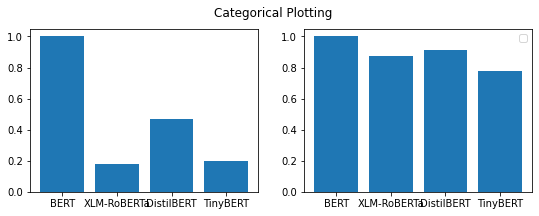

[1, 0.1815561795298372, 0.4656573002909622, 0.19659377733509037]
[1, 0.8767568711433992, 0.9115580593395549, 0.7752347646983395]


In [48]:
# For Scores
import matplotlib.pyplot as plt
# Summaraize scores
performance_models = ['BERT','XLM-RoBERTa', 'DistilBERT', 'TinyBERT']
performance_scores = [1, 0, 0, 0]
performance_lmscores= [1, 0, 0, 0]

for i in range(len(performance_scores)-1):
    for j in range(7):
        performance_scores[i+1] = performance_scores[i+1] + models[i].iloc[j,1]
        performance_lmscores[i+1] = performance_lmscores[i+1] + models[i].iloc[j,4]

    performance_scores[i+1] = performance_scores[i+1] / 7
    performance_lmscores[i+1] = performance_lmscores[i+1] / 7

plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.bar(performance_models, performance_scores)
plt.subplot(122)
plt.bar(performance_models, performance_lmscores)
plt.suptitle('Scores ')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# Summaraize scores
performance_models = ['BERT','XLM-RoBERTa', 'DistilBERT', 'TinyBERT']
performance_scores = [1, 0, 0, 0]
performance_lmscores= [1, 0, 0, 0]

for i in range(len(performance_scores)-1):
    for j in range(7):
        performance_scores[i+1] = performance_scores[i+1] + models[i].iloc[j,1]
        performance_lmscores[i+1] = performance_lmscores[i+1] + models[i].iloc[j,4]

    performance_scores[i+1] = performance_scores[i+1] / 7
    performance_lmscores[i+1] = performance_lmscores[i+1] / 7

plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.bar(performance_models, performance_scores)
plt.subplot(122)
plt.bar(performance_models, performance_lmscores)
plt.suptitle('Scores ')
plt.legend()
plt.show()

No handles with labels found to put in legend.


[1, 0.8767568711433992, 0.9115580593395549, 0.7752347646983395]


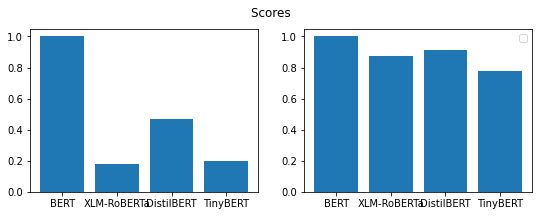

In [55]:
performance_models = ['BERT','XLM-RoBERTa', 'DistilBERT', 'TinyBERT']
performance_time = [1, 0, 0, 0]
performance_lmtime= [1, 0, 0, 0]
performance_usage= [1, 0, 0, 0]
performance_lmusage= [1, 0, 0, 0]


for i in range(len(performance_scores)-1):
    for j in range(7):
        performance_time[i+1] = performance_time[i+1] + models[i].iloc[j,1]
        performance_lmtime[i+1] = performance_lmtime[i+1] + models[i].iloc[j,4]

    performance_time[i+1] = performance_time[i+1] / 7
    performance_lmtime[i+1] = performance_lmtime[i+1] / 7

def Avg_values(model, feature):
    perf = [1, 0, 0, 0]
    for i in range(len(perf)-1):
        for j in range(7):
            perf[i+1] = perf[i+1] + models[i].iloc[j,feature]
        perf[i+1] = perf[i+1] / 7
    return perf
print(Avg_values(1,4))





plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.bar(performance_models, performance_scores)
plt.subplot(122)
plt.bar(performance_models, performance_lmscores)
plt.suptitle('Scores ')
plt.legend()
plt.show()


